In [17]:
import random
import numpy as np
import keras
#import wandb
from wandb.keras import WandbCallback
from keras.models import Sequential, Model
from keras.layers import Flatten, Dense, Concatenate, Dot, Lambda, Input
from keras.datasets import mnist
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [18]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() #Load data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [3]:
'''a = np.arange(10)
print(a)
print(np.where(a < 5, a, 10*a))'''

'a = np.arange(10)\nprint(a)\nprint(np.where(a < 5, a, 10*a))'

In [19]:
# make pairs
def make_pairs(x, y):
    num_classes = max(y) + 1
    digit_indices = [np.where(y == i)[0] for i in range(num_classes)]

    pairs = []
    labels = []

    for idx1 in range(len(x)):
        # add a matching example
        x1 = x[idx1]
        label1 = y[idx1]
        idx2 = random.choice(digit_indices[label1])
        x2 = x[idx2]
        
        pairs += [[x1, x2]]
        labels += [1]
    
        # add a not matching example
        label2 = random.randint(0, num_classes-1)
        while label2 == label1:
            label2 = random.randint(0, num_classes-1)

        idx2 = random.choice(digit_indices[label2])
        x2 = x[idx2]
        
        pairs += [[x1, x2]]
        labels += [0]

    return np.array(pairs), np.array(labels)

pairs_train, labels_train = make_pairs(x_train, y_train)
pairs_test, labels_test = make_pairs(x_test, y_test)

1


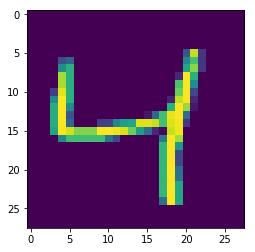

In [20]:
# take a peek at the data
plt.imshow(pairs_train[4,0])
print(labels_train[4])

1


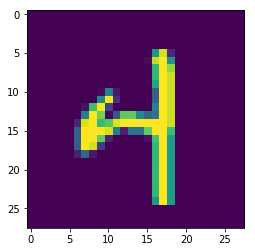

In [21]:
plt.imshow(pairs_train[4,1])
print(labels_train[4])

In [22]:

# Weights not shared

seq1 = Sequential()
seq1.add(Flatten(input_shape=(28,28)))
seq1.add(Dense(128, activation='relu'))

seq2 = Sequential()
seq2.add(Flatten(input_shape=(28,28)))
seq2.add(Dense(128, activation='relu'))

merge_layer = Concatenate()([seq1.output, seq2.output])
dense_layer = Dense(1, activation="sigmoid")(merge_layer)
model = Model(inputs=[seq1.input, seq2.input], outputs=dense_layer)

In [23]:

model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
flatten_5_input (InputLayer)    (None, 28, 28)       0                                            
__________________________________________________________________________________________________
flatten_6_input (InputLayer)    (None, 28, 28)       0                                            
__________________________________________________________________________________________________
flatten_5 (Flatten)             (None, 784)          0           flatten_5_input[0][0]            
__________________________________________________________________________________________________
flatten_6 (Flatten)             (None, 784)          0           flatten_6_input[0][0]            
__________________________________________________________________________________________________
dense_8 (D

In [24]:

#wandb.init(project="siamese")
model.fit([pairs_train[:,0], pairs_train[:,1]], labels_train[:], batch_size=16, epochs= 10)

Epoch 1/10
120000/120000 [==============================] - 34s 281us/step - loss: 0.6947 - acc: 0.5044
Epoch 2/10
120000/120000 [==============================] - 36s 300us/step - loss: 0.6930 - acc: 0.5061
Epoch 3/10
120000/120000 [==============================] - 36s 299us/step - loss: 0.6928 - acc: 0.5100
Epoch 4/10
120000/120000 [==============================] - 36s 299us/step - loss: 0.6924 - acc: 0.5146
Epoch 5/10
120000/120000 [==============================] - 35s 295us/step - loss: 0.6920 - acc: 0.5170
Epoch 6/10
120000/120000 [==============================] - 36s 301us/step - loss: 0.6914 - acc: 0.5169
Epoch 7/10
120000/120000 [==============================] - 35s 295us/step - loss: 0.6907 - acc: 0.5206
Epoch 8/10
120000/120000 [==============================] - 36s 299us/step - loss: 0.6900 - acc: 0.5225
Epoch 9/10
120000/120000 [==============================] - 36s 302us/step - loss: 0.6890 - acc: 0.5272
Epoch 10/10
120000/120000 [==============================] - 37s

In [ ]:

input = Input((28,28))
x = Flatten()(input)
x = Dense(128, activation='relu')(x)
dense = Model(input, x)

input1 = Input((28,28))
input2 = Input((28,28))

dense1 = dense(input1)
dense2 = dense(input2)

merge_layer = Concatenate()([dense1, dense2])
dense_layer = Dense(1, activation="sigmoid")(merge_layer)
model = Model(inputs=[input1, input2], outputs=dense_layer)

In [ ]:
model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 28, 28)       0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 28, 28)       0                                            
__________________________________________________________________________________________________
model_2 (Model)                 (None, 128)          100480      input_2[0][0]                    
                                                                 input_3[0][0]                    
__________________________________________________________________________________________________
concatenate_2 (Concatenate)     (None, 256)          0           model_2[1][0]                    
          

In [ ]:
#wandb.init(project="siamese")
model.fit([pairs_train[:,0], pairs_train[:,1]], labels_train[:], batch_size=16, epochs=10)

Epoch 1/10
120000/120000 [==============================] - 25s 210us/step - loss: 0.6942 - acc: 0.5021
Epoch 2/10
120000/120000 [==============================] - 25s 206us/step - loss: 0.6932 - acc: 0.5063
Epoch 3/10
 97120/120000 [=======================>......] - ETA: 4s - loss: 0.6931 - acc: 0.5012

In [25]:

from keras import backend as K

def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))


input = Input((28,28))
x = Flatten()(input)
x = Dense(128, activation='relu')(x)
dense = Model(input, x)

input1 = Input((28,28))
input2 = Input((28,28))

dense1 = dense(input1)
dense2 = dense(input2)

merge_layer = Lambda(euclidean_distance)([dense1,dense2])
dense_layer = Dense(1, activation="sigmoid")(merge_layer)
model = Model(inputs=[input1, input2], outputs=dense_layer)

In [26]:

model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 28, 28)       0                                            
__________________________________________________________________________________________________
input_9 (InputLayer)            (None, 28, 28)       0                                            
__________________________________________________________________________________________________
model_7 (Model)                 (None, 128)          100480      input_8[0][0]                    
                                                                 input_9[0][0]                    
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 1)            0           model_7[1][0]                    
          

In [27]:
#wandb.init(project="siamese")
model.fit([pairs_train[:,0], pairs_train[:,1]], labels_train[:], batch_size=16, epochs=10)

Epoch 1/10
120000/120000 [==============================] - 33s 272us/step - loss: 0.4449 - acc: 0.7974
Epoch 2/10
120000/120000 [==============================] - 41s 344us/step - loss: 0.3478 - acc: 0.8535
Epoch 3/10
120000/120000 [==============================] - 28s 230us/step - loss: 0.3083 - acc: 0.8730
Epoch 4/10
120000/120000 [==============================] - 25s 212us/step - loss: 0.2972 - acc: 0.8766
Epoch 5/10
120000/120000 [==============================] - 25s 212us/step - loss: 0.2928 - acc: 0.8797
Epoch 6/10
120000/120000 [==============================] - 25s 212us/step - loss: 0.2895 - acc: 0.8807
Epoch 7/10
120000/120000 [==============================] - 26s 214us/step - loss: 0.2849 - acc: 0.8824
Epoch 8/10
120000/120000 [==============================] - 25s 212us/step - loss: 0.2810 - acc: 0.8851
Epoch 9/10
120000/120000 [==============================] - 26s 213us/step - loss: 0.2787 - acc: 0.8867
Epoch 10/10
120000/120000 [==============================] - 25s